# Example: Centroid Vetting.
### How to look for centroid offset between in and out of transit

In [10]:
import numpy
import matplotlib
import exovetter as exo
from exovetter import const
from exovetter import utils
import exovetter.vetters as vet
import lightkurve as lk
import astropy.units as u

In [2]:
candidate = "TOI 1013.01"

In [3]:
tce = utils.get_mast_tce(candidate)
tce

{'canonical_name': 'TOI 1013.01', 'exoplanetID': 59656, 'catalog_name': 'toi', 'planet_name': 'TOI 1013.01', 'disposition': 'unknown', 'modified_date': '2021-06-28 20:28:59.831000', 'star_name': 'TIC 97700520', 'component': None, 'Rs': None, 'Rs_unit': None, 'Rs_upper': None, 'Rs_lower': None, 'Rs_ref': None, 'Rs_url': None, 'Ms': None, 'Ms_unit': None, 'Ms_upper': None, 'Ms_lower': None, 'Ms_ref': None, 'Ms_url': None, 'Fe/H': None, 'Fe/H_upper': None, 'Fe/H_lower': None, 'Fe/H_ref': None, 'Fe/H_url': None, 'stellar_gravity': None, 'stellar_gravity_upper': None, 'stellar_gravity_lower': None, 'stellar_gravity_ref': None, 'stellar_gravity_url': None, 'Teff': None, 'Teff_unit': None, 'Teff_upper': None, 'Teff_lower': None, 'Teff_ref': None, 'Teff_url': None, 'Vmag': 7.489999771118164, 'Vmag_unit': 'mag', 'Vmag_upper': 0.029999999329447746, 'Vmag_lower': 0.029999999329447746, 'Vmag_ref': 'TESS Input Catalog, v8.2', 'Vmag_url': 'http://adsabs.harvard.edu/abs/2018AJ....156..102S', 'Jmag': 

[{'period': <Quantity 5.425555 d>,
  'epoch': <Quantity 58493.86798 d>,
  'epoch_offset': <Quantity -2400000.5 d>,
  'depth': <Quantity 0.01493963>,
  'duration': <Quantity 0.15745833 d>,
  'target': 'TOI 1013.01'}]

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

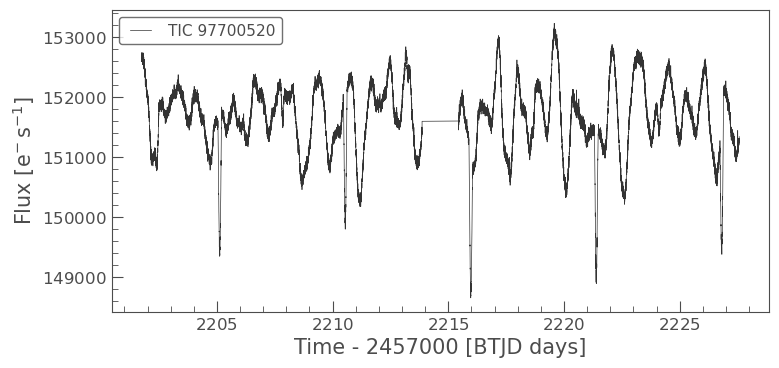

In [4]:
lc = lk.search_lightcurve(candidate, sector=33, exptime=120).download()
lc.plot()

[131. 132. 133. 134. 135.]
6
[130. 130. 130. ... 135. 135. 135.]


{'num_transits': 5}

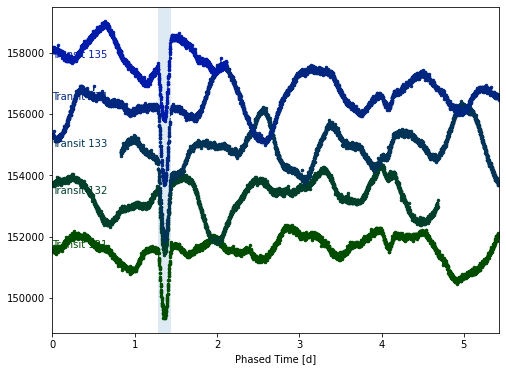

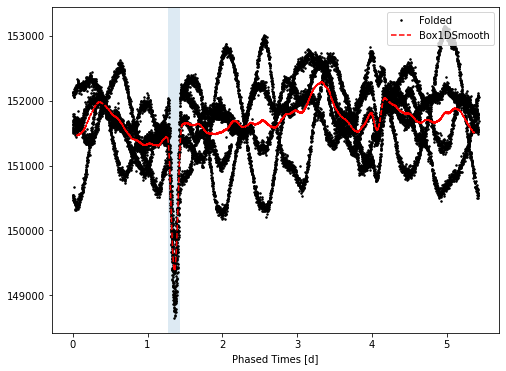

In [5]:
viz = vet.VizTransits()
viz.run(tce[0], lc, plot=True)

{'offset': 0.021920767844219733, 'significance': array([0.43030206])}

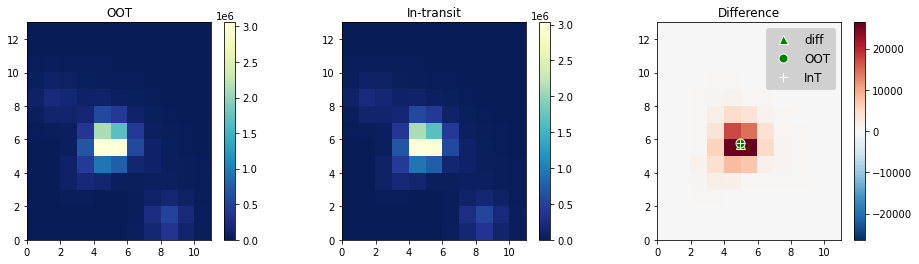

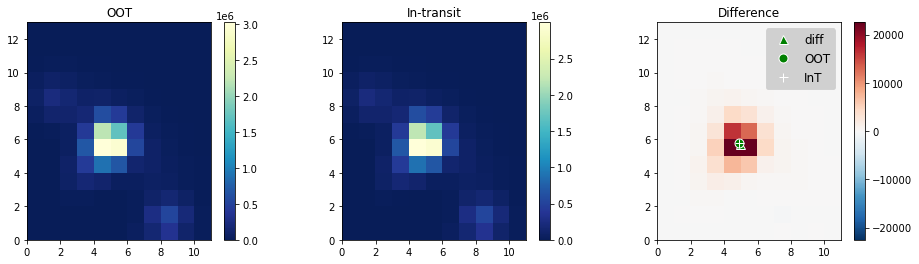

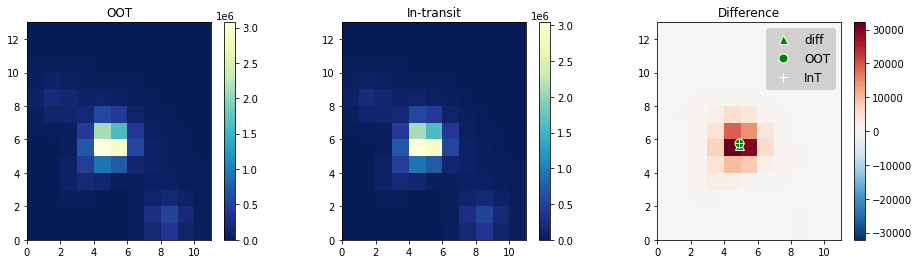

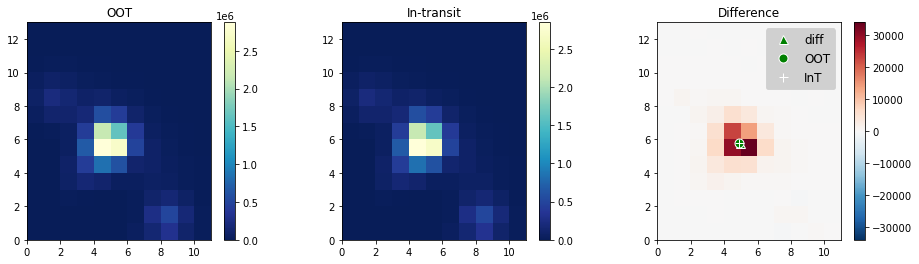

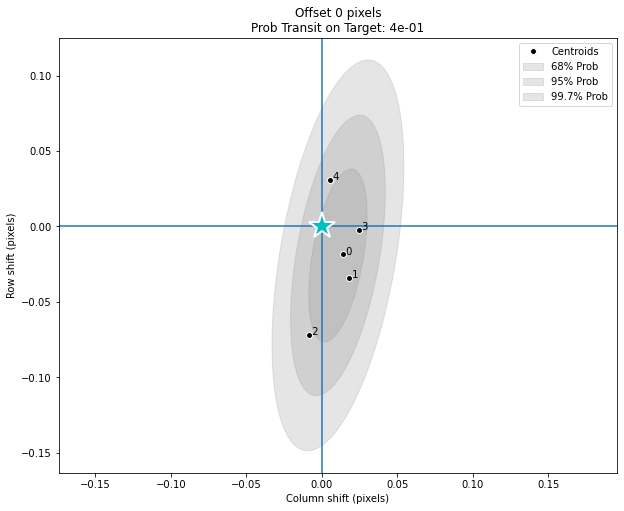

In [6]:
%matplotlib inline
tpf = lk.search_targetpixelfile(candidate, sector=33, exptime=120).download()
cent = vet.Centroid()
cent.run(tce[0],tpf, plot=True)

In [41]:
candidate = "TOI 565.01"
tce = utils.get_mast_tce(candidate)
tce

[{'period': <Quantity 3.727891 d>,
  'epoch': <Quantity 58519.370491 d>,
  'epoch_offset': <Quantity -2400000.5 d>,
  'depth': <Quantity 0.0178643>,
  'duration': <Quantity 0.16139208 d>,
  'target': 'TOI 565.01'}]

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

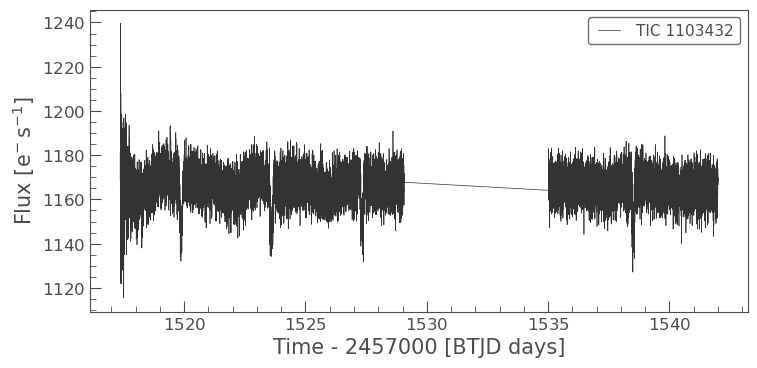

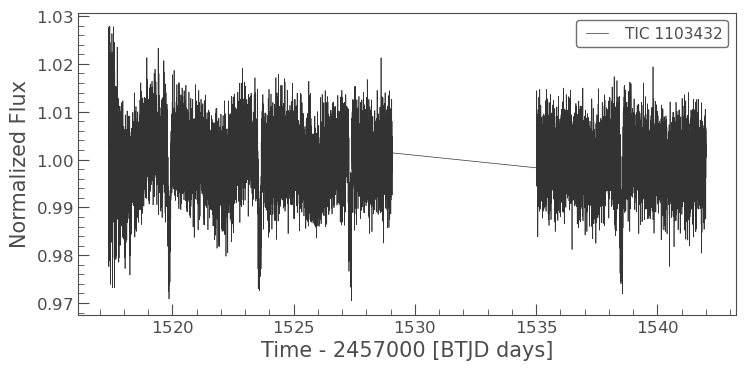

In [42]:
lc = lk.search_lightcurve(candidate)[0].download()
lc.plot()
cleanlc = lc.remove_outliers().normalize()
cleanlc.plot()

[0. 1. 2. 4. 5. 6.]
7
[-1. -1. -1. ...  6.  6.  6.]


{'num_transits': 6}

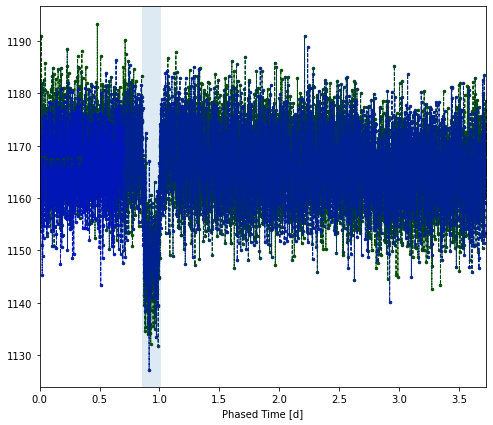

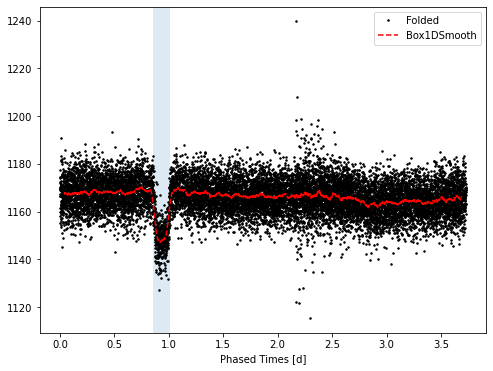

In [43]:
viz = vet.VizTransits()
viz.run(tce[0],lc, plot=True)

{'offset': 4.865912882834971, 'significance': array([0.])}

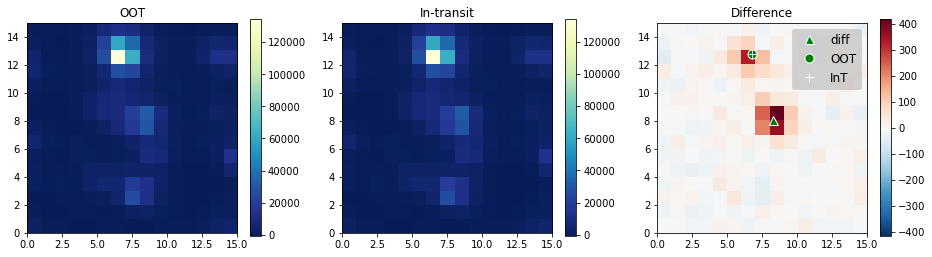

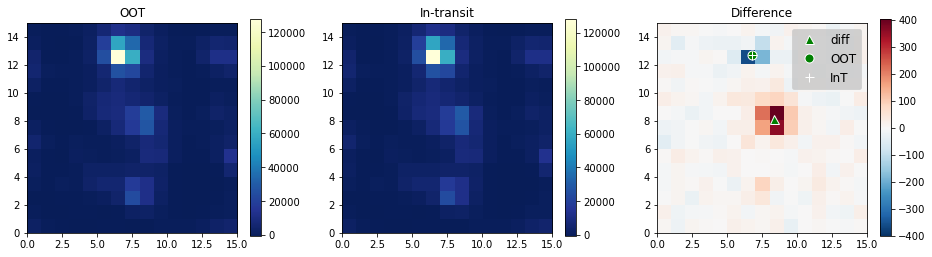

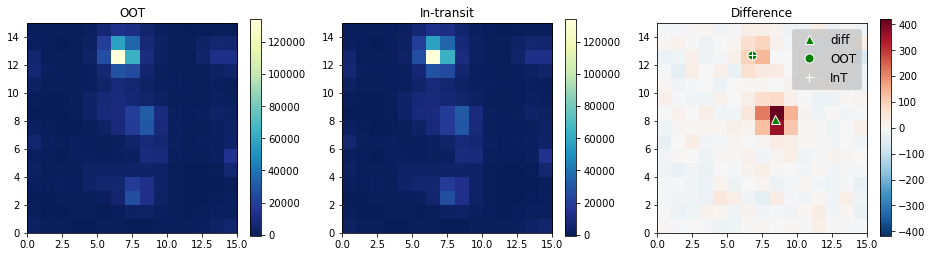

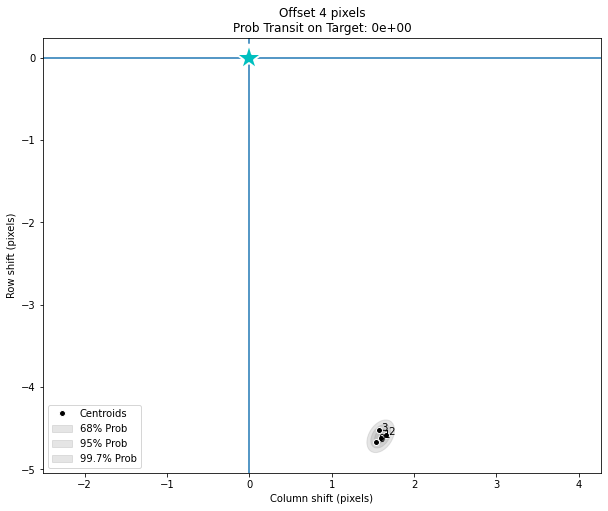

In [44]:
tpf = lk.search_targetpixelfile(candidate)[0].download()
cent = vet.Centroid()
cent.run(tce[0],tpf,plot=True)